### import dataset

In [279]:
import pandas as pd

In [280]:
df=pd.read_csv('Restaurant_Reviews.tsv',sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [281]:
df.shape

(1000, 2)

### Data preprocessing

In [282]:
# lower case

In [283]:
df['Review']=df['Review'].str.lower()

In [284]:
df.head()

,Review,Liked
0,wow... loved this place.,1
1,crust is not good.,0
2,not tasty and the texture was just nasty.,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [285]:
# Removing punctuations

In [286]:
import string
string.punctuation
exclude=string.punctuation

In [287]:
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [288]:
def remove_punch(x):
    for i in exclude:
        x=x.replace(i,'')
    return x

In [289]:
remove_punch('hey!! , how are you????')

'hey  how are you'

In [290]:
df['Review']=df['Review'].apply(remove_punch)

In [291]:
df.head()

,Review,Liked
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


### feature Extraction

In [292]:
# Apply TF-IDF vectorizer on preprocessed Data

In [293]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [294]:
tf= TfidfVectorizer()
x=tf.fit_transform(df['Review']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [295]:
x.shape

(1000, 2067)

In [296]:
y=df['Liked']

In [297]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: Liked, dtype: int64

### train test split

In [298]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [299]:
xtrain.shape

(800, 2067)

### Build Neural Network

In [300]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping

In [301]:
model=Sequential()

In [302]:
# add input layer
model.add(Input(shape=(xtrain.shape[1],)))

# create dense layer 1
model.add(Dense(units=128, activation='relu'))

# create dropout layer1 
model.add(Dropout(rate=0.5))

# create dense layer 2
model.add(Dense(units=64, activation='relu'))

# create dropout layer 2
model.add(Dropout(rate=0.4))

# create output layer
model.add(Dense(units=1, activation = 'sigmoid'))

# model complilation
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Add earlystopping
es=EarlyStopping(monitor='val_loss',patience=15)

In [303]:
hist=model.fit(xtrain,ytrain,validation_split=0.1, epochs=100, callbacks=[es])

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4902 - loss: 0.6937 - val_accuracy: 0.5500 - val_loss: 0.6920
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6942 - loss: 0.6806 - val_accuracy: 0.5625 - val_loss: 0.6860
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8244 - loss: 0.6490 - val_accuracy: 0.6375 - val_loss: 0.6624
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8827 - loss: 0.5645 - val_accuracy: 0.6750 - val_loss: 0.6053
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9300 - loss: 0.4080 - val_accuracy: 0.6750 - val_loss: 0.5362
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9606 - loss: 0.2321 - val_accuracy: 0.7375 - val_loss: 0.4936
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9892 - loss: 0.1247 - val_accuracy: 0.7875 - val_loss: 0.4587
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9918 - loss: 0.0747 - val_accuracy: 0.7625 - 

In [304]:
model.evaluate(xtrain,ytrain)
model.evaluate(xtest,ytest)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9975 - loss: 0.0077     
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8473 - loss: 0.5443 


[0.6121220588684082, 0.824999988079071]

### predictions

In [305]:
yprob_train=model.predict(xtrain)
yprob_test=model.predict(xtest)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [306]:
yprob_train[:5]

array([[9.9906641e-01],
       [9.9968362e-01],
       [4.3410282e-06],
       [6.3513411e-04],
       [1.1530584e-04]], dtype=float32)

In [307]:
ypred_tr=[]
for i in yprob_train:
    if i<0.5:
        ypred_tr.append(0)
    else:
        ypred_tr.append(1)

In [308]:
ypred_tr[:5]

[1, 1, 0, 0, 0]

In [309]:
ypred_ts=[]
for i in yprob_test:
    if i<0.5:
        ypred_ts.append(0)
    else:
        ypred_ts.append(1)

In [310]:
ypred_ts[:5]

[1, 1, 1, 1, 0]

In [311]:
# model evaluation

In [312]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

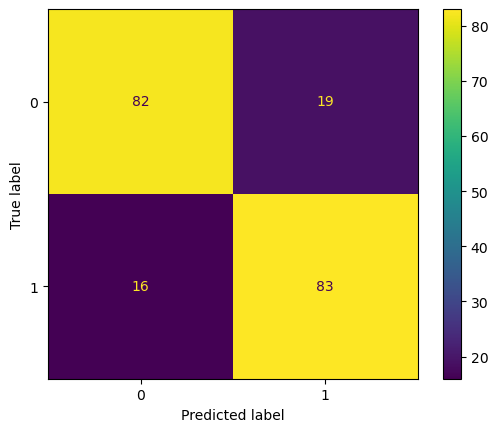

In [313]:
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()

In [314]:
st=input('enter your review :')
stl=st.lower()
strm=remove_punch(stl)
sttf=tf.transform([strm]).toarray()

pred=model.predict([sttf])

if pred>0.5:
  print('Positive review')
else:
  print('negative review')

enter your review :wow loved this place!!!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Positive review
